# Extraction.

Extraction is an attack where an adversary attempts to build a model that is similar or identical to a victim model. In simple words, extraction is the attempt of copying or stealing a machine learning model. Extraction attacks typically require access to the original model, as well as to data that is similar or identical to the data originally used to train the victim model.

__[Source](https://kedion.medium.com/ml-security-with-the-adversarial-robustness-toolbox-d173b24e8c1a)__

## Similar dataset
The Stanford Dogs dataset contains images of 120 breeds of dogs from around the world. This dataset has been built using images and annotation from ImageNet for the task of fine-grained image categorization. It was originally collected for fine-grain image categorization, a challenging problem as certain dog breeds have near identical features or differ in colour and age.

Content
- Number of categories: 120
- Number of images: 20,580
- Annotations: Class labels, Bounding boxes

__[Source](https://www.kaggle.com/datasets/jessicali9530/stanford-dogs-dataset/)__

## Dataset preparation
__[Source](https://www.kaggle.com/code/thiennguyen15/stanford-dogs-keras-vgg16/)__

In [ ]:
%pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import os, cv2
import numpy as np
from tqdm import tqdm

In [ ]:
def label_assignment(img,label):
    return label

def training_data(label,data_dir):
    for img in tqdm(os.listdir(data_dir)):
        label = label_assignment(img,label)
        path = os.path.join(data_dir,img)
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        img = cv2.resize(img,(imgsize,imgsize))

        X.append(np.array(img))
        Z.append(str(label))

In [ ]:
chihuahua_dir = 'stanford_dogs_dataset/images/Images/n02085620-Chihuahua'
japanese_spaniel_dir = 'stanford_dogs_dataset/images/Images/n02085782-Japanese_spaniel'
maltese_dir = 'stanford_dogs_dataset/images/Images/n02085936-Maltese_dog'
pekinese_dir = 'stanford_dogs_dataset/images/Images/n02086079-Pekinese'
shitzu_dir = 'stanford_dogs_dataset/images/Images/n02086240-Shih-Tzu'

blenheim_spaniel_dir = 'stanford_dogs_dataset/images/Images/n02086646-Blenheim_spaniel'
papillon_dir = 'stanford_dogs_dataset/images/Images/n02086910-papillon'
toy_terrier_dir = 'stanford_dogs_dataset/images/Images/n02087046-toy_terrier'
rhodesian_ridgeback_dir = 'stanford_dogs_dataset/images/Images/n02087394-Rhodesian_ridgeback'
afghan_hound_dir = 'stanford_dogs_dataset/images/Images/n02088094-Afghan_hound'

basset_dir = 'stanford_dogs_dataset/images/Images/n02088238-basset'
beagle_dir = 'stanford_dogs_dataset/images/Images/n02088364-beagle'
bloodhound_dir = 'stanford_dogs_dataset/images/Images/n02088466-bloodhound'
bluetick_dir = 'stanford_dogs_dataset/images/Images/n02088632-bluetick'
black_and_tan_coonhound_dir = 'stanford_dogs_dataset/images/Images/n02089078-black-and-tan_coonhound'

walker_hound_dir = 'stanford_dogs_dataset/images/Images/n02089867-Walker_hound'
english_foxhound_dir = 'stanford_dogs_dataset/images/Images/n02089973-English_foxhound'
redbone_dir = 'stanford_dogs_dataset/images/Images/n02090379-redbone'
borzoi_dir = 'stanford_dogs_dataset/images/Images/n02090622-borzoi'
irish_wolfhound_dir = 'stanford_dogs_dataset/images/Images/n02090721-Irish_wolfhound'

X = []
Z = []
imgsize = 150

In [ ]:
training_data('chihuahua', chihuahua_dir)
training_data('japanese_spaniel', japanese_spaniel_dir)
training_data('maltese', maltese_dir)
training_data('pekinese', pekinese_dir)
training_data('shitzu', shitzu_dir)

training_data('blenheim_spaniel', blenheim_spaniel_dir)
training_data('papillon', papillon_dir)
training_data('toy_terrier', toy_terrier_dir)
training_data('rhodesian_ridgeback', rhodesian_ridgeback_dir)
training_data('afghan_hound', afghan_hound_dir)

training_data('basset', basset_dir)
training_data('beagle', beagle_dir)
training_data('bloodhound', bloodhound_dir)
training_data('bluetick', bluetick_dir)
training_data('black_and_tan_coonhound', black_and_tan_coonhound_dir)

training_data('basset', basset_dir)
training_data('beagle', beagle_dir)
training_data('bloodhound', bloodhound_dir)
training_data('bluetick', bluetick_dir)
training_data('black_and_tan_coonhound', black_and_tan_coonhound_dir)

training_data('walker_hound', walker_hound_dir)
training_data('english_foxhound', english_foxhound_dir)
training_data('redbone', redbone_dir)
training_data('borzoi', borzoi_dir)
training_data('irish_wolfhound', irish_wolfhound_dir)

100%|██████████| 218/218 [00:01<00:00, 201.65it/s]


In [ ]:
%pip install tensorflow
%pip install keras
%pip install np_utils

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [ ]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [ ]:
label_encoder= LabelEncoder()
Y = label_encoder.fit_transform(Z)
Y = to_categorical(Y,20)
X = np.array(X)
X=X/255

x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=100)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
augs_gen = ImageDataGenerator(
        featurewise_center=False,
        samplewise_center=False,
        featurewise_std_normalization=False,
        samplewise_std_normalization=False,
        zca_whitening=False,
        rotation_range=10,
        zoom_range = 0.1,
        width_shift_range=0.2,
        height_shift_range=0.2,
        horizontal_flip=True,
        vertical_flip=False)

augs_gen.fit(x_train)

In [ ]:
import matplotlib.pyplot as plt
import random as rn

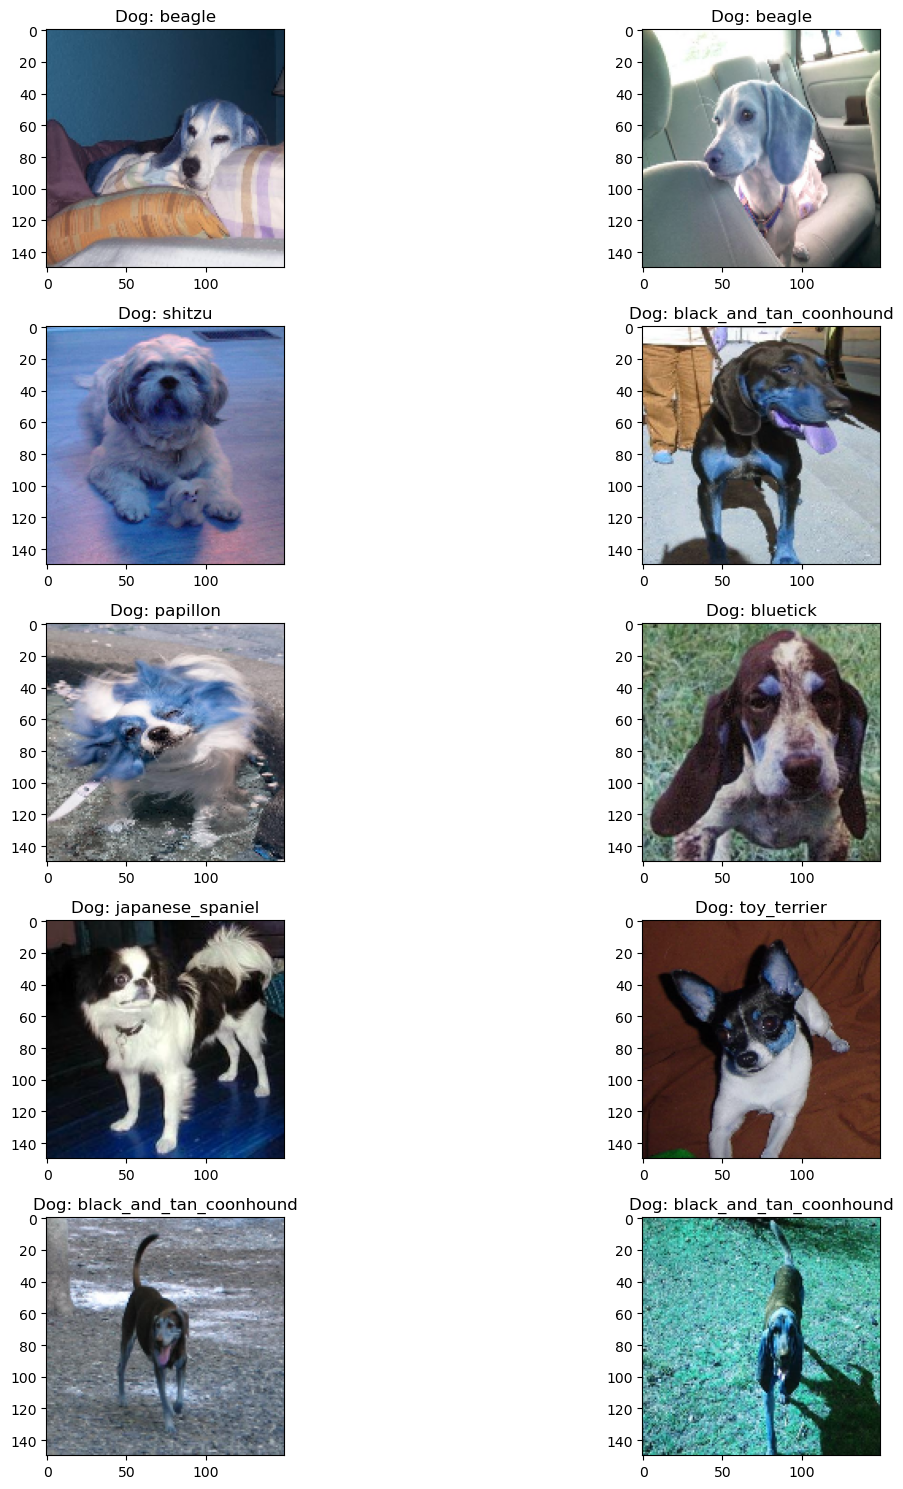

In [ ]:
fig,ax=plt.subplots(5,2)
fig.set_size_inches(15,15)
for i in range(5):
    for j in range (2):
        l=rn.randint(0,len(Z))
        ax[i,j].imshow(X[l])
        ax[i,j].set_title('Dog: '+Z[l])

plt.tight_layout()

## Same Model but untrained

In [ ]:
from torchvision import models
from torch import nn
import torch

hidden_units = 500
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model_type = "densenet121"
model = models.__dict__[model_type](pretrained=False)

try:
    input_size = model.classifier[0].in_features
except TypeError:
    input_size = model.classifier.in_features

#Transfer Learning using pretrained weights
from collections import OrderedDict
classifier = nn.Sequential(OrderedDict([
                              ("drop", nn.Dropout(0.2)),
                              ('fc1', nn.Linear(input_size, hidden_units)),
                              ('relu', nn.ReLU()),
                              ('fc2', nn.Linear(hidden_units, 120)),
                              ('output', nn.LogSoftmax(dim=1))
                              ]))

model.classifier = classifier
model.to(device)

DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace=True)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
        (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu

In [ ]:
from torchvision import datasets, transforms
train_dir = 'stanford_dogs_dataset/images/train/'
valid_dir = 'stanford_dogs_dataset/images/valid/'

######### Load the data:
train_transforms = transforms.Compose([transforms.RandomRotation(30),
                                       transforms.RandomHorizontalFlip(0.5),
                                       transforms.Resize(225),
                                       transforms.CenterCrop(224),
                                       transforms.ToTensor(),
                                       transforms.Normalize([0.485, 0.456, 0.406],[0.229, 0.224, 0.225])])

val_transforms = transforms.Compose([transforms.Resize(225),
                                      transforms.CenterCrop(224),
                                      transforms.ToTensor(),
                                      transforms.Normalize([0.485, 0.456, 0.406],[0.229, 0.224, 0.225])])


#Load the dataset
train_data = datasets.ImageFolder(train_dir, transform=train_transforms)
val_data = datasets.ImageFolder(valid_dir, transform=val_transforms)


#Using the image datasets and the trainforms, define the dataloaders
trainloader = torch.utils.data.DataLoader(train_data, batch_size=64, shuffle=True)
valloader = torch.utils.data.DataLoader(val_data, batch_size=64)

In [ ]:
epochs = 10
lr = 0.0001

criterion = nn.NLLLoss()
optimizer = torch.optim.Adam(model.parameters(), lr)


for e in range(epochs):
    print("epoch: ",e)
    running_loss = 0
    for images, labels in trainloader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()

        log_prob = model(images)
        loss = criterion(log_prob, labels)
        loss.backward()

        optimizer.step()

        running_loss += loss.item()

    else:

        print("this is validation")
        val_loss = 0
        accuracy = 0

        with torch.no_grad():
            model.eval()
            for images, labels in valloader:
                images, labels = images.to(device), labels.to(device)
                log_ps = model(images)
                val_loss += criterion(log_ps, labels)

                ps = torch.exp(log_ps)
                top_p, top_class = ps.topk(1, dim=1)
                equals = top_class == labels.view(*top_class.shape)
                accuracy += torch.mean(equals.type(torch.FloatTensor))

        model.train()


        print("Epoch: {}/{}.. ".format(e+1, epochs),
                "Training Loss: {:.3f}.. ".format(running_loss/len(trainloader)),
                "Validation Loss: {:.3f}.. ".format(val_loss/len(valloader)),
                "Validation Accuracy: {:.3f}".format(accuracy/len(valloader)))



name_location_to_save = "{}/extracted_model.pth".format(args.save_dir)

##############Saving the model
model.class_to_idx = train_data.class_to_idx

model.cpu()
torch.save({"state_dict": model.state_dict(),
            "class_to_idx": model.class_to_idx,
            "arch" : model_type,
            "classifier" : model.classifier},

            name_location_to_save)

## Using Adversarial Robustness Toolbox (ART) for Python implemented defense against the "Extraction" cybersecurity attack

Assume these as given:
- X_train = training data
- Y_train = training labels
- model (arhcitecture, activation functions, etc.)
- trained_classifier = Classifier (a trained instance of the model)

Install ART

In [ ]:
%pip install adversarial-robustness-toolbox

In [ ]:
import ThresholdDetector
detector = ThresholdDetector(trained_classifier)

## Threshold Detector

### CREATE ATTACK
Create "Copy Cat Convolution Neural Network" (CopycatCNN) to generate adversarial examples

In [ ]:
from art.attacks.extraction import CopycatCNN
attack = CopycatCNN(classifier)  # CREATE ATTACK
X_adv = attack.generate(X_train)  # GENERATE SAMPLES

### DETECT

In [ ]:
detected = detector.detect(X_adv)  # DETECT SAMPLES
print(f"Detected {sum(detected)} / {len(detected)}")

## Trainer

In [ ]:
from art.defences.trainer import AdversarialTrainerMadryPGD
trainer = AdversarialTrainerMadryPGD(classifier)

Train on generated adversarial samples

In [ ]:
trainer.fit(x_train, y_train, nb_epochs=10, batch_size=64)

**Commentary:** This approach uses a detector of adversarial samples as a "trainer" for the model to make it more robust against extraction via implicit gradient masking as dicussed in the report (OpenAI section). Additional steps like limited prediction request count per user and only reporting top prediction with no direct numeric associated probability would be implemented on front end side of the application.   